# Objective

The objective of this report is to describe the changes to the vapor compression cycle model, recent improvements to experimental apparatus and results, and next steps for construction and evaluation of the final thermal management system iteration.

# Hypothesis

It was hypothesized that by replacing the current surface mount thermocouples with immersion thermocouples better agreement between the model and experimental results could be achieved. As an alternative to replacement, it was also hypothesized that better agreement could be achieved by applying a thermal compound to the surface mount thermocouples. Regarding the model, it was hypothesized that adding pressure drops across the heat exchangers as well as entropy loss and enthalpy gain during the compression and expansion processes respectively could result in better modeling of the system. Finally, it was hypothesized that replacing the model’s expansion valve function with a mass flowrate correlation for capillary tubes would result in better modeling due to the use of capillary tubes in the prototype.

# Methods

## Experimental Adjustments

In the current experimental setup measurements of pressure and temperature are taken after each thermodynamic process in the vapor compression refrigeration cycle (VCRC). The figure below shows an example of an VCRC with and without losses. The cycles are numbered 1-8 showing the refrigerant undergoing thermodynamic changes. Points 6 and 7 are coincident because there is no phase change from a subcooled fluid to a saturated mixture after expansion. 

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import Image, display
# from PIL import Image
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot
from analysis_functions import *
import optimization_functions as of
import warnings
from importlib import reload 
from scipy.optimize import root_scalar
plt.close('all')
# %matplotlib widget

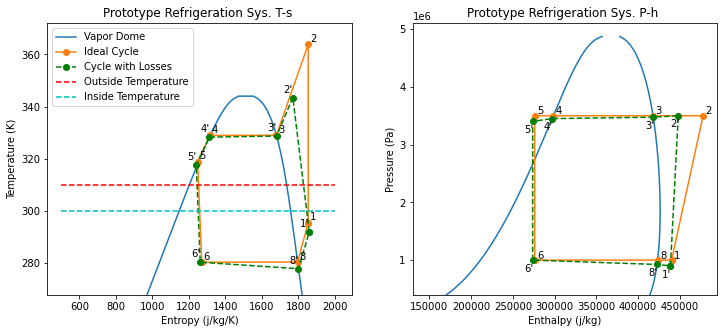

In [2]:
example_plots()

In the context of these cycles the experimental measurements are taken at points 1’, 2’, 5’ and 6’. The measurements at 2’, 5’, and 6’ are located on the outside of the prototype while the measurement at 1’ is located inside of the prototype. Previous experiments have shown that the measurements taken by the surface mounted thermocouples are inaccurate due the gradient effects between the inside/outside temperatures and the refrigerant temperature. As a result, temperature measurements at 2’ and 5’ have been substantially lower than we know the refrigerant to be and measurements at 6’ and 1’ have been substantially higher. In an effort two remedy these inaccuracies two adjustments to the experimental apparatus are tried: replacing the surface mounted thermocouples with immersion thermocouples and adhering the surface mount thermocouples with thermal paste to the refrigerant tubing.  The thermal paste is used to insulate from the ambient temperature and increase heat transfer from the refrigerant. 

In the first experiment Four Omega Engineering TC-K-1/8NPT-U-72 immersion thermocouples were attached to the prototype’s refrigeration cycle schrader valve ports and a test was run with the heating element power at maximum (1390) and the wind tunnel at 500 RPM (~ 5.2 m/s). 

In the following experiment a hybrid approach was taken with three immersion thermocouples at points 1’, 5’, and 6’ and a surface mount thermocouple at 2’. The test was run with the heating element power at maximum (1389) and the wind tunnel at 500 RPM (~ 5.2 m/s).


Finally, the 4 surface mount thermocouples which were previously installed were adhered to the refrigeration tubing at their respective locations using McMaster-Carr 3883K24 Heat Sink Compound. A test was run with the heating element power at maximum (1366 W) and the wind tunnel at 500 RPM (~ 5.2 m/s). Nine additional tests were conducted under the same conditions with heating element power ranging from 1365 - 1450 W .

## Model Adjustments

The VCRC model developed by Dubicki et al. uses 4 functions which represent the 4 major components of a VCRC: the compressor, the condenser, the expansion valve, and the evaporator. The four functions are used in conjunction with the thermodynamic values of the refrigerant (R-410a) and air in an optimization to minimize the norm of the mass and energy deficits. To improve this model, for the purpose of evaluating the POD’s thermal management system prototype, the component function representing expansion has been changed from a thermostatic expansion valve mass flow rate model to a capillary tube mass flow rate correlation. An enthalpy gain of 47.5 % was also added to the expansion function and a superheat entropy loss of 20% was added to the compressor function. 

# Results

Figure 2 shows the steady state results of the thermodynamic values based on measurements from four immersion thermocouples and four pressure transducers.

Figure 3 shows the steady state results of the thermodynamic values based on measurements from three immersion thermocouples, one surface mount thermocouple at 2' and four pressure transducers.

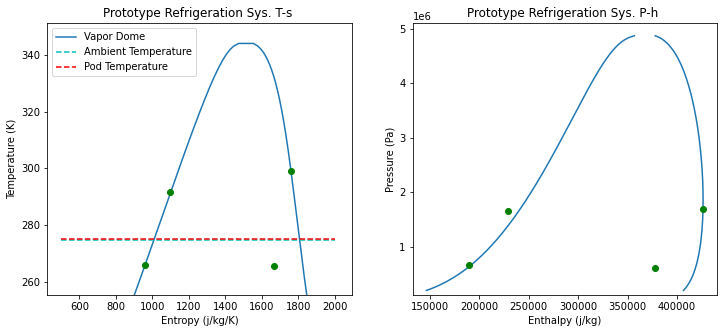

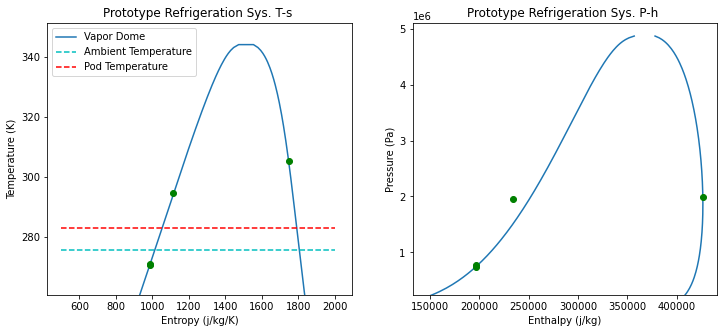

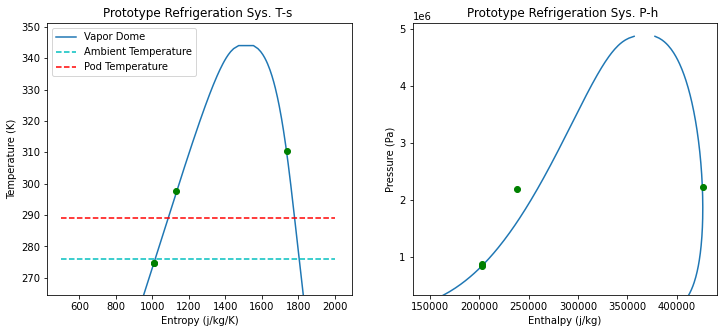

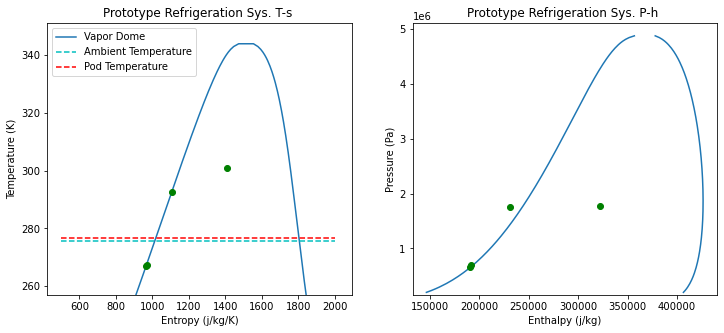

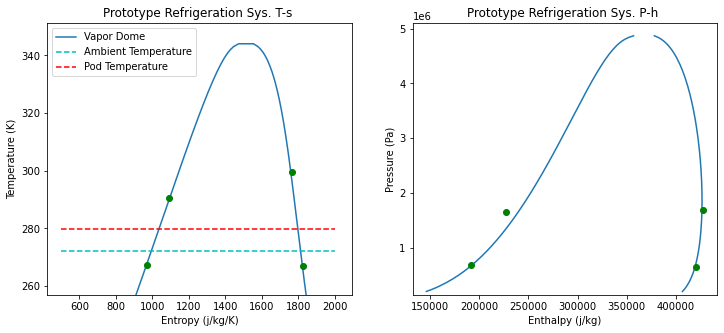

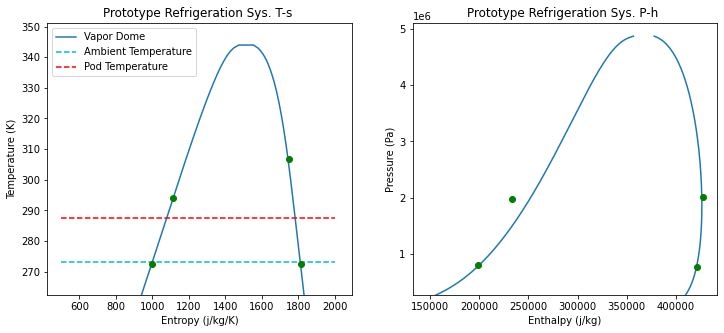

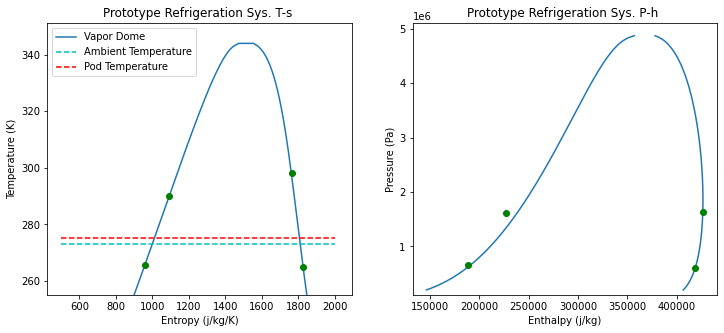

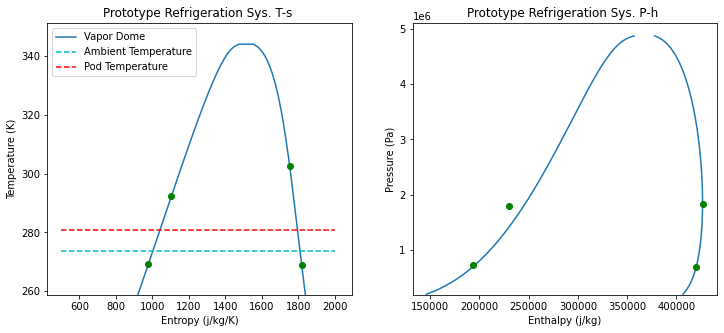

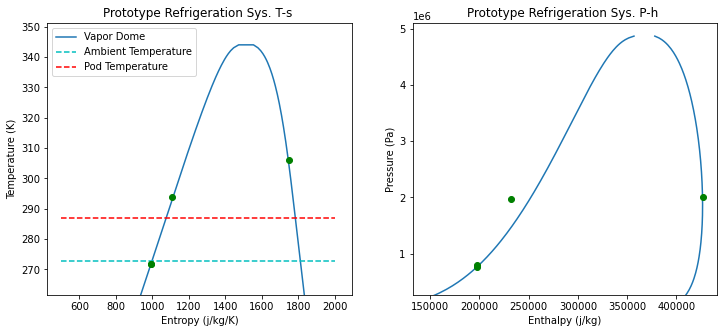

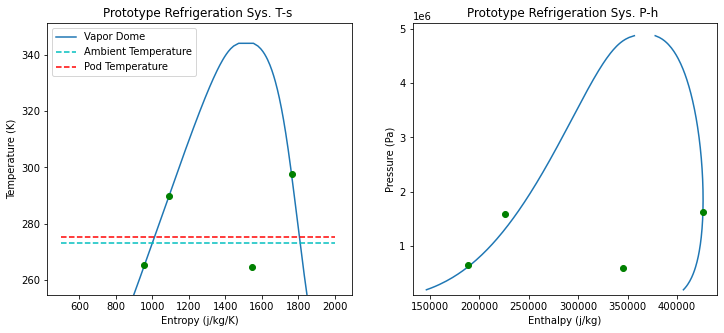

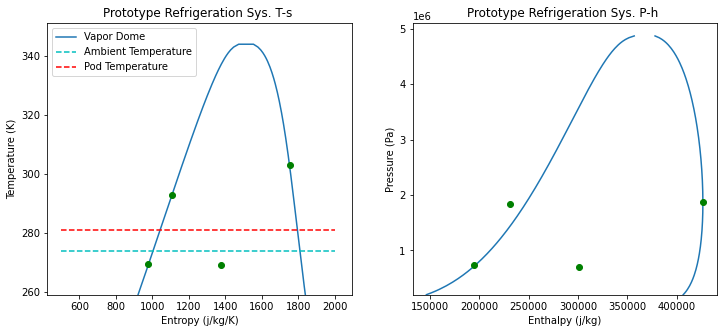

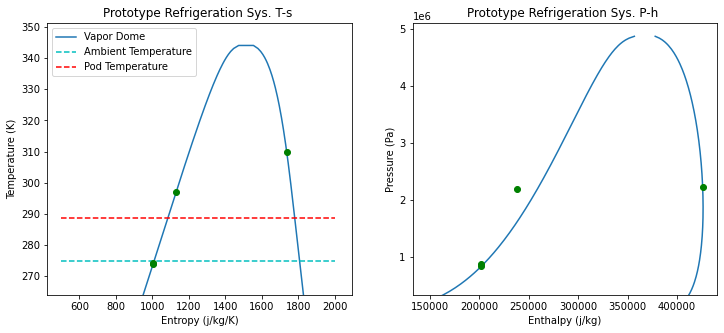

In [1]:
from analysis_functions import *

path = 'C:/Users/charl/Google Drive/school/Graduate/Pod Project/Prototype/'

# Files
files =['01-23-2021/test.lvm', '01-23-2021/test2.lvm', '01-23-2021/test3.lvm', '01-23-2021/test4.lvm', 
        '01-24-2021/test.lvm', '01-24-2021/test2.lvm', '01-24-2021/test3.lvm', '01-24-2021/test4.lvm',
        '01-25-2021/test.lvm', '01-25-2021/test2.lvm', '01-25-2021/test3.lvm', '01-25-2021/test4.lvm',
       ]

# Ambient Pressure (Pa)
P_amb = [100.81e3, 100.83e3, 100.74e3, 100.77e3,
         100.83e3, 100.78e3, 100.67e3, 100.70e3,
         101.37e3, 101.23e3, 101.25e3, 101.24e3,
        ]

# Heating Element Power (W)
Q_element = [0.58e3, 0.81e3, 1.00e3, 0.6e3, 
             0.81e3, 1.03e3, 0.61e3, 0.80e3,
             1.01e3, 0.61e3, 0.82e3, 1.03e3,
            ]

# Refrigeration System Work (W)
W_refrig = [0.380e3, 0.405e3, 0.439e3, 0.395e3,
            0.395e3, 0.417e3, 0.375e3, 0.400e3,
            0.416e3, 0.379e3, 0.405e3, 0.459e3,
           ]

experimentalData = pd.DataFrame()

# experimentalData = pd.read_pickle(path + 'experimentalDataframe.pkl')



for ind, file in enumerate(files):

    experimentalData = experimentalData.append(experimental_analysis_fan(path + file, P_amb[ind], Q_element[ind], W_refrig[ind]))


    thermodynamic_plots(experimentalData.iloc[-1])
    
experimentalData = experimentalData.reset_index()
        
# experimentalData.to_pickle(path + 'experimentalDataframe.pkl')

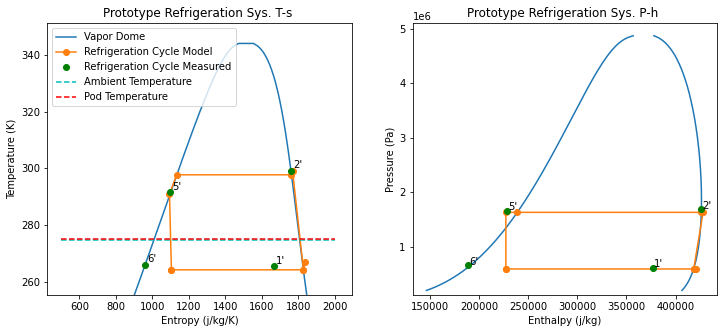

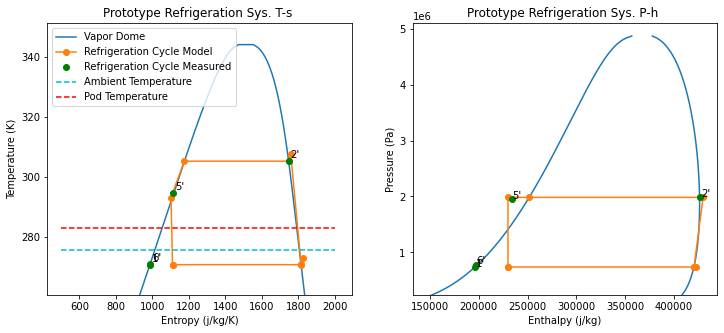

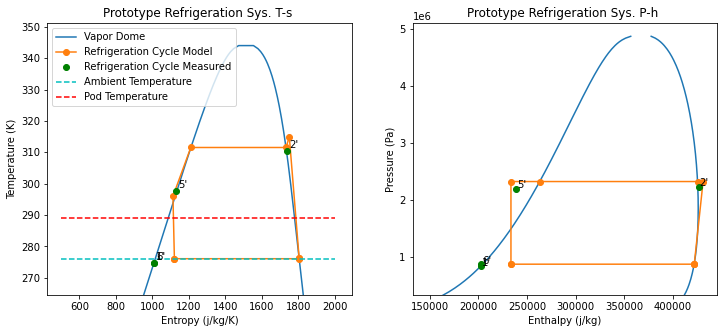

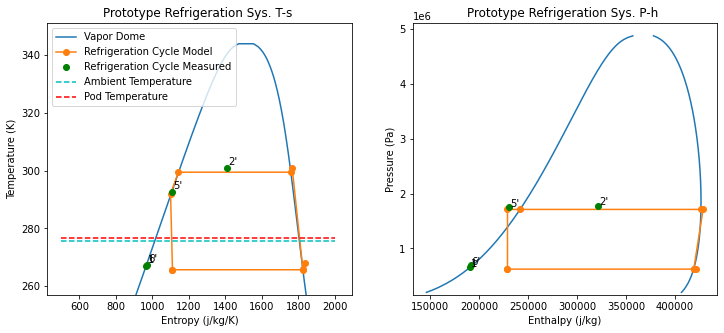

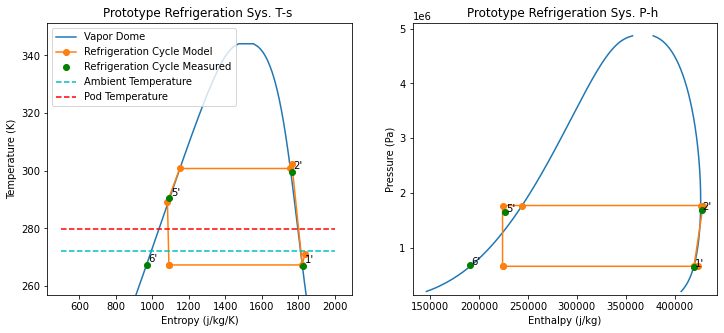

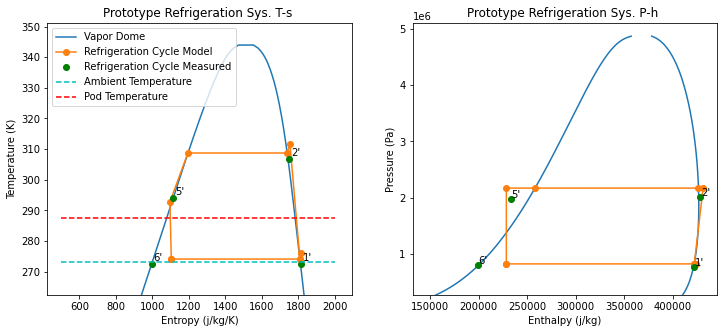

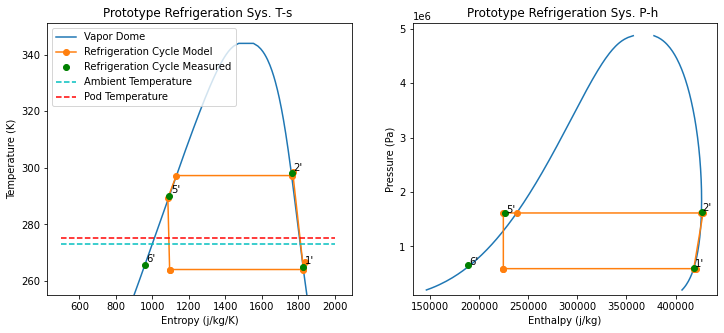

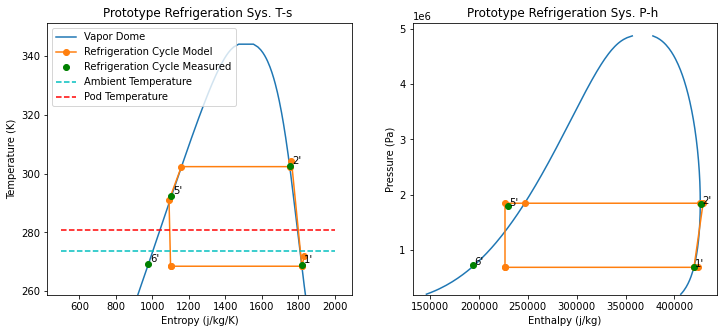

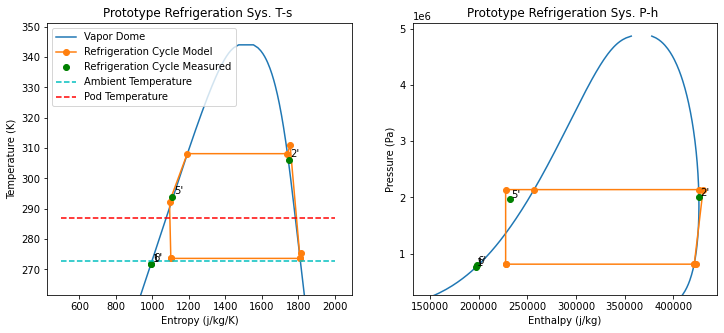

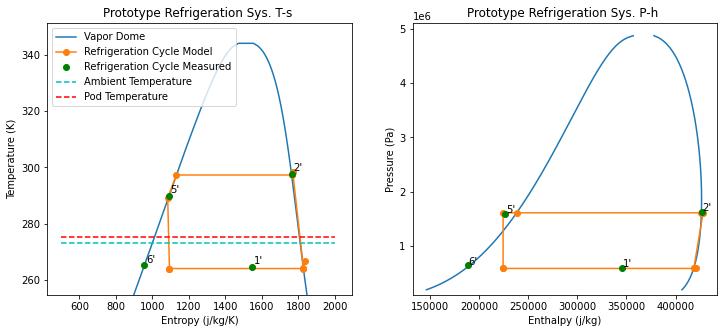

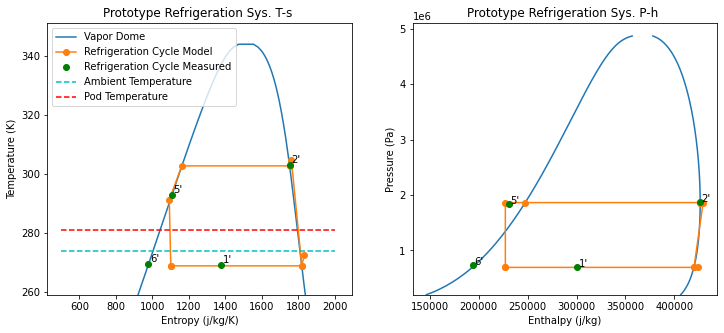

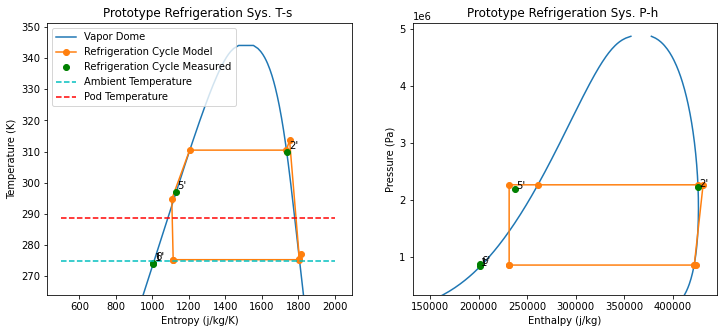

In [3]:
modelData = pd.read_pickle(path + 'modelDataframe.pkl')

# modelData = pd.DataFrame()
# error_P = []
# error_T = []

for index, row in experimentalData.iterrows():

#     Inputs = np.array([
#                        row['Ambient T (K)'],
#                        row['Pod T (K)'],
#                        row['Total Heat Load (W)'],
#                       ])

#     Param = np.array([5000,
#                       2600, # Matches HT-900 CFM of 350 CFM and ~ 40: W measured with power meter 01/22 https://www.cnet.com/products/honeywell-ht-900-turboforce-air-circulator-fan/
#                       3300 # Matches 80 W measured with power meter 01/22
#                      ])

#     [Props, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit, converged] = of.solve_cycle_shotgun(Inputs,
#                                                                                                           Param)

#     modelData = modelData.append(pd.DataFrame({'P (Pa)': [Props[0]], 
#                                                'T (K)': [Props[1]], 
#                                                'h (j/kg)': [Props[2]], 
#                                                's (j/kg K)': [Props[3]], 
#                                                'abcissa': [Props[4]], 
#                                                'Mass Flux (kg/s)': [m_dot], 
#                                                'Evaporator Heat Transfer (W)': Q_L, 
#                                                'Condenser Heat Transfer (W)': Q_H, 
#                                                'Compressor Work (W)': W_comp, 
#                                                'Condenser Fan Work': W_fan_c, 
#                                                'Evapoator Fan Work': W_fan_e, 
#                                                'COSP': COSP, 
#                                                'Deficits': [Deficit]}
#                                              )
#                                 )

#     print(Deficit)

    thermodynamic_plots(experimentalData.iloc[index], modelData.iloc[index], 
                        lgnd = ['Vapor Dome', 
                                'Refrigeration Cycle Model',
                                'Refrigeration Cycle Measured', 
                                'Ambient Temperature',
                                'Pod Temperature'], 
                        annotate = True)
    



#     one_P = (modelData.iloc[index]['P (Pa)'][0] - row['P (Pa)'][0]) / row['P (Pa)'][0]
#     two_P = (modelData.iloc[index]['P (Pa)'][1] - row['P (Pa)'][1]) / row['P (Pa)'][1]
#     five_P = (modelData.iloc[index]['P (Pa)'][4] - row['P (Pa)'][2]) / row['P (Pa)'][2]
#     six_P = (modelData.iloc[index]['P (Pa)'][5] - row['P (Pa)'][3]) / row['P (Pa)'][3]
#     error_P.append([one_P, two_P, five_P, six_P])
    
#     one_T = (modelData.iloc[index]['T (K)'][0] - row['T (K)'][0]) 
#     two_T = (modelData.iloc[index]['T (K)'][1] - row['T (K)'][1])
#     five_T = (modelData.iloc[index]['T (K)'][4] - row['T (K)'][2])
#     six_T = (modelData.iloc[index]['T (K)'][5] - row['T (K)'][3])
#     error_T.append([one_T, two_T, five_T, six_T])

# modelData = modelData.reset_index()
# modelData['Pressure Error'] = error_P
# modelData['Temperature Error'] = error_T
# modelData['Heat Rejection Error'] = (modelData['Evaporator Heat Transfer (W)'] - experimentalData['Total Heat Load (W)']) / experimentalData['Total Heat Load (W)']
# modelData['Work Error'] = (modelData['Compressor Work (W)'] - experimentalData['Compressor Work (W)']) / experimentalData['Compressor Work (W)']
# modelData['COP Error'] = (modelData['Evaporator Heat Transfer (W)'] / modelData['Compressor Work (W)']  - experimentalData['COP']) / experimentalData['COP']
# modelData['COSP Error'] = (modelData['COSP']  - experimentalData['COSP']) / experimentalData['COSP']

# modelData.to_pickle(path + 'modelDataframe.pkl')



C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')


no exception when superheated phase takes up entire domain
initial Point: [3.08528305e+05 5.23944292e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.08528305e+05 9.95135988e+05 5.00000000e-01]
Compression ratio too high: 9.222255916246574
initial Point: [8.74369581e+05 9.95135988e+05 5.00000000e-01]
Compression ratio too high: 6.389125666167369
initial Point: [1.84229444e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 3.5162029029058877
initial Point: [1.84229444e+06 5.23944292e+05 5.00000000e-01]
Compression ratio too high: 11.14035103704666
initial Point: [3.21230288e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 6.1310008133479
initial Point: [3.21230288e+06 5.23944292e+05 5.00000000e-01]
Compression ratio too high: 4.229273357218845
initial Point: [3.21230288e+06 7.59540140e+05 5.00000000e-01]
Compression ratio too high: 3.2280039263257354
initial Point: [3.21230288e+06 9.95135988e+05 5.00000000e-01]
[ 

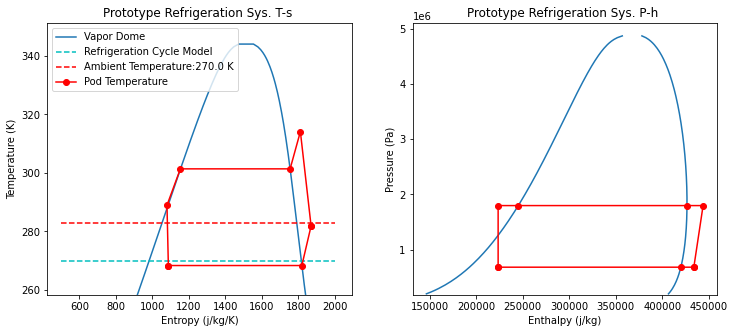

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


no exception when superheated phase takes up entire domain
initial Point: [3.06142618e+05 9.95135988e+05 5.00000000e-01]
Compression ratio too high: 4.260400973987239
initial Point: [8.65622061e+05 7.59540140e+05 5.00000000e-01]
Compression ratio too high: 6.336726028149467
initial Point: [1.82718508e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 3.487365191936229
initial Point: [1.82718508e+06 5.23944292e+05 5.00000000e-01]
Compression ratio too high: 11.065888393547537
initial Point: [3.19083169e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 6.090020908285753
initial Point: [3.19083169e+06 5.23944292e+05 5.00000000e-01]
Compression ratio too high: 4.2010046901713105
initial Point: [3.19083169e+06 7.59540140e+05 5.00000000e-01]
Compression ratio too high: 3.206427792433685
initial Point: [3.19083169e+06 9.95135988e+05 5.00000000e-01]
[-3.92734575e-08  4.22639861e-08  1.07944496e-07]


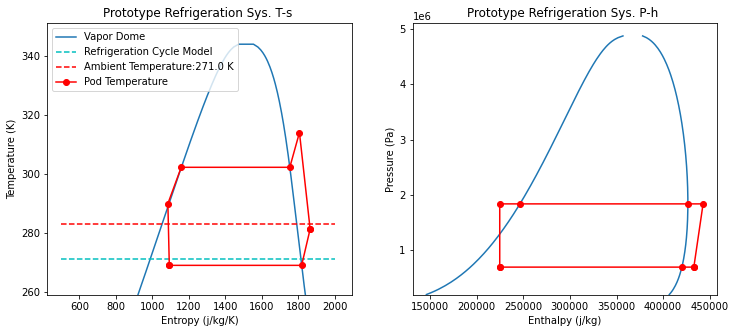

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')


no exception when superheated phase takes up entire domain
initial Point: [3.03697718e+05 5.23944292e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.03697718e+05 7.59540140e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.03697718e+05 9.95135988e+05 5.00000000e-01]
Compression ratio too high: 6.283025845483894
initial Point: [1.81170072e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 3.4578117368875767
initial Point: [1.81170072e+06 5.23944292e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:41: UserWarning: Flooded Compressor, vapor quality < 1
  warnings.warn('Flooded Compressor, vapor quality < 1')


Compression ratio too high: 10.989577607654354
initial Point: [3.16882759e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 6.048023893216616
initial Point: [3.16882759e+06 5.23944292e+05 5.00000000e-01]
Compression ratio too high: 4.172034402558899
initial Point: [3.16882759e+06 7.59540140e+05 5.00000000e-01]


C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:796: RuntimeWarning: invalid value encountered in double_scalars
  pi_8 = 150.26 * pi_1**-0.5708 * pi_2**-1.4636 * pi_4**1.953 * pi_5**c_5 * pi_6**1.4181 * pi_9**-0.0158


array must not contain infs or NaNs
initial Point: [3.16882759e+06 9.95135988e+05 5.00000000e-01]
[-6.95723495e-08 -7.29881076e-08  5.11895468e-08]


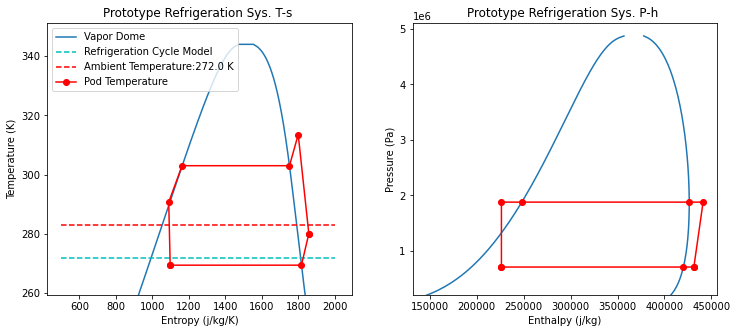

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\charl\Google Drive\school\Graduate\Pod Project\Prototype\VCRC\cycle_functions.py:921: UserWarning: Partial Evaporation
  warnings.warn('Partial Evaporation')


Residual function in secant returned invalid number : PropsSI("T","P",-23945309.93,"Q",1,"R410a")
initial Point: [3.01192655e+05 5.23944292e+05 5.00000000e-01]
no exception when superheated phase takes up entire domain
initial Point: [3.01192655e+05 9.95135988e+05 5.00000000e-01]
Compression ratio too high: 4.134057334053243
initial Point: [8.47472197e+05 7.59540140e+05 5.00000000e-01]
Compression ratio too high: 6.228004215594629
initial Point: [1.79583532e+06 2.88348443e+05 5.00000000e-01]
Compression ratio too high: 3.4275310341986747
initial Point: [1.79583532e+06 5.23944292e+05 5.00000000e-01]


KeyboardInterrupt: 

In [8]:
controlData = pd.DataFrame()

# Ambient Temperature (K)
T_amb = np.linspace(270, 275, 6)

# Interior Temperature (K)
T_interior = 283

# Heat Load (W)
heat_load = 780

for temp in T_amb:
    Inputs = np.array([
                       temp,
                       T_interior,
                       heat_load,
                      ])

    Param = np.array([5000,
                      2600, # Matches HT-900 CFM of 350 CFM and ~ 40: W measured with power meter 01/22 https://www.cnet.com/products/honeywell-ht-900-turboforce-air-circulator-fan/
                      3300 # Matches 80 W measured with power meter 01/22
                     ])

    [Props, m_dot, Q_L, Q_H, W_comp, W_fan_c, W_fan_e, COSP, Deficit, converged] = of.solve_cycle_shotgun(Inputs,
                                                                                                          Param)

    controlData = controlData.append(pd.DataFrame({'P (Pa)': [Props[0]], 
                                                   'T (K)': [Props[1]], 
                                                   'h (j/kg)': [Props[2]], 
                                                   's (j/kg K)': [Props[3]], 
                                                   'abcissa': [Props[4]], 
                                                   'Mass Flux (kg/s)': [m_dot], 
                                                   'Evaporator Heat Transfer (W)': Q_L, 
                                                   'Condenser Heat Transfer (W)': Q_H, 
                                                   'Compressor Work (W)': W_comp, 
                                                   'Condenser Fan Work': W_fan_c, 
                                                   'Evapoator Fan Work': W_fan_e, 
                                                   'COSP': COSP, 
                                                   'Deficits': [Deficit],
                                                   'Ambient T (K)' : temp,
                                                   'Pod T (K)': T_interior}
                                                 )
                                    )
    print(Deficit)

    thermodynamic_plots(controlData.iloc[-1], 
                        lgnd = ['Vapor Dome', 
                                'Refrigeration Cycle Model',
                                'Ambient Temperature:' + str(temp) + ' K',
                                'Pod Temperature'], 
                        style =['r-o', None])

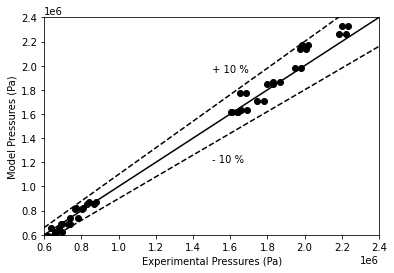

In [111]:
# Pressure error plot
for index, row in modelData.iterrows():
    

    # Plot experimental vs model Data
    plt.plot(experimentalData['P (Pa)'].iloc[index], row['P (Pa)'][[0, 1, 4, 5]], 'ko')

# + 10 % error bar
plt.plot(np.linspace(0.6e6, 2.4e6), np.linspace(0.6e6, 2.4e6) + 0.1 * np.linspace(0.6e6, 2.4e6), 'k--')
plt.annotate('+ 10 %', ((2.4e6 + 0.6e6) / 2, 1.3 * (2.4e6 + 0.6e6) / 2))

# + 10 % error bar
plt.plot(np.linspace(0.6e6, 2.4e6), np.linspace(0.6e6, 2.4e6) - 0.1 * np.linspace(0.6e6, 2.4e6), 'k--')
plt.annotate('- 10 %', ((2.4e6 + 0.6e6) / 2, 0.8 * (2.4e6 + 0.6e6) / 2))

# No error line
plt.plot(np.linspace(0.6e6, 2.4e6), np.linspace(0.6e6, 2.4e6) , 'k-')

# Axis limits and labels
plt.xlim([0.6e6, 2.4e6])
plt.ylim([0.6e6, 2.4e6])
plt.ylabel('Model Pressures (Pa)')
plt.xlabel('Experimental Pressures (Pa)')
    
plt.show()

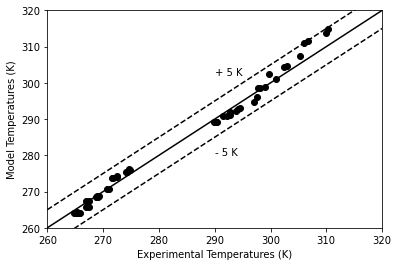

In [112]:
# Temperature error plot
for index, row in modelData.iterrows():
    
    # Plot experimental vs model Data
    plt.plot(experimentalData['T (K)'].iloc[index], row['T (K)'][[0, 1, 4, 5]], 'ko')
    
# + 5 K error bar
plt.plot(np.linspace(260, 320), np.linspace(260, 320) + 5, 'k--')
plt.annotate('+ 5 K', ((260 + 320) / 2, (260 + 320) / 2 + 12))

# - 5 K  error bar
plt.plot(np.linspace(260, 320), np.linspace(260, 320) - 5, 'k--')
plt.annotate('- 5 K', ((260 + 320) / 2,  (260 + 320) / 2 - 10))

# No Error line
plt.plot(np.linspace(260, 320), np.linspace(260, 320), 'k-')

# axis limits and labels
plt.ylim([260, 320])
plt.xlim([260, 320])
plt.ylabel('Model Temperatures (K)')
plt.xlabel('Experimental Temperatures (K)')
    
plt.show()

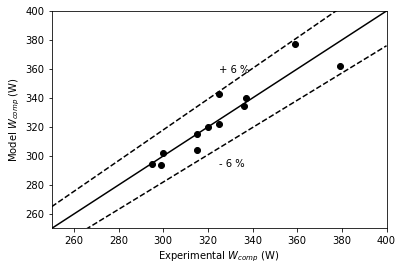

In [128]:
# Compressor error plot
plt.plot(experimentalData['Compressor Work (W)'], modelData['Compressor Work (W)'], 'ko')

# No Error line
plt.plot(np.linspace(250, 400), np.linspace(250, 400), 'k-')

# + 10 % error bar
plt.plot(np.linspace(250, 400), np.linspace(250, 400) + 0.06 * np.linspace(250, 400), 'k--')
plt.annotate('+ 6 %', ((250 + 400) / 2, 1.1 * (250 + 400) / 2))

# + 10 % error bar
plt.plot(np.linspace(250, 400), np.linspace(250, 400) - 0.06 * np.linspace(250, 400), 'k--')
plt.annotate('- 6 %', ((250 + 400) / 2, 0.9 * (250 + 400) / 2))

# axis limits and labels
plt.ylim([250, 400])
plt.xlim([250, 400])
plt.ylabel('Model $W_{comp}$ (W)')
plt.xlabel('Experimental $W_{comp}$ (W)')

plt.show()

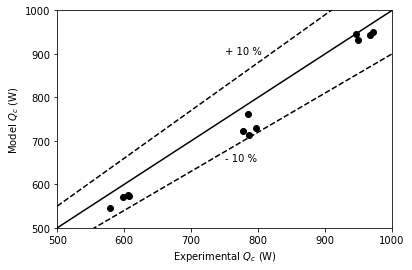

In [118]:
# Evaporator Heat Transfer Error Plot
plt.plot(experimentalData['Total Heat Load (W)'], modelData['Evaporator Heat Transfer (W)'], 'ko')

# No Error line
plt.plot(np.linspace(500, 1000), np.linspace(500, 1000), 'k-')

# + 10 % error bar
plt.plot(np.linspace(500, 1000), np.linspace(500, 1000) + 0.1 * np.linspace(500, 1000), 'k--')
plt.annotate('+ 10 %', ((500 + 1000) / 2, 1.2 * (500 + 1000) / 2))

# + 10 % error bar
plt.plot(np.linspace(500, 1000), np.linspace(500, 1000) - 0.1 * np.linspace(500, 1000), 'k--')
plt.annotate('- 10 %', ((500 + 1000) / 2, 0.87 * (500 + 1000) / 2))

# axis limits and labels
plt.ylim([500, 1000])
plt.xlim([500, 1000])
plt.ylabel('Model $Q_c$ (W)')
plt.xlabel('Experimental $Q_c$ (W)')

plt.show()

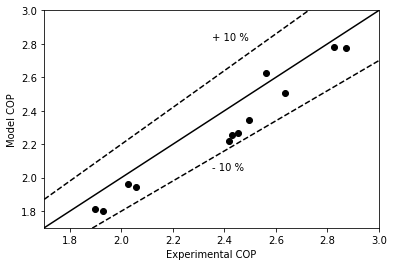

In [130]:
plt.plot(experimentalData['COP'], 
         modelData['Evaporator Heat Transfer (W)'] / modelData['Compressor Work (W)'], 
         'ko')

# No Error line
plt.plot(np.linspace(1.7, 3), np.linspace(1.7, 3), 'k-')

# + 10 % error bar
plt.plot(np.linspace(1.7, 3), np.linspace(1.7, 3) + 0.1 * np.linspace(1.7, 3), 'k--')
plt.annotate('+ 10 %', ((1.7 + 3) / 2, 1.2 * (1.7 + 3) / 2))

# + 10 % error bar
plt.plot(np.linspace(1.7, 3), np.linspace(1.7, 3) - 0.1 * np.linspace(1.7, 3), 'k--')
plt.annotate('- 10 %', ((1.7 + 3) / 2, 0.87 * (1.7 + 3) / 2))

# axis limits and labels
plt.ylim([1.7, 3])
plt.xlim([1.7, 3])
plt.ylabel('Model COP')
plt.xlabel('Experimental COP')

plt.show()

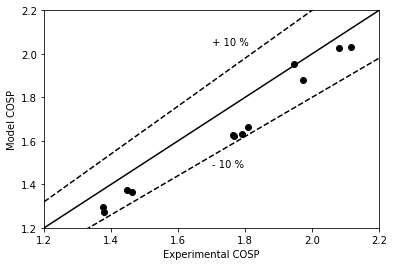

In [129]:
plt.plot(experimentalData['COSP'], modelData['COSP'], 'ko')

# No Error line
plt.plot(np.linspace(1.2, 2.2), np.linspace(1.2, 2.2), 'k-')

# + 10 % error bar
plt.plot(np.linspace(1.2, 2.2), np.linspace(1.2, 2.2) + 0.1 * np.linspace(1.2, 2.2), 'k--')
plt.annotate('+ 10 %', ((1.2 + 2.2) / 2, 1.2 * (1.2 + 2.2) / 2))

# + 10 % error bar
plt.plot(np.linspace(1.2, 2.2), np.linspace(1.2, 2.2) - 0.1 * np.linspace(1.2, 2.2), 'k--')
plt.annotate('- 10 %', ((1.2 + 2.2) / 2, 0.87 * (1.2 + 2.2) / 2))

# axis limits and labels
plt.ylim([1.2, 2.2])
plt.xlim([1.2, 2.2])
plt.ylabel('Model COSP')
plt.xlabel('Experimental COSP')

plt.show()

# Discussion

The results in figure 2 from first experiment show that even with the immersion thermocouples the temperatures at all 4 points are being significantly affected by the temperature gradient with respect to the ambient air. At points 2’ and 5’ the temperatures are well below what would be expected, especially the temperature at point 5’ which if correct would indicate that after compression the refrigerant is still a subcooled liquid. At points 1’ and 6’ the temperatures are above what would be expected for the given pressure and indicate a superheated gas.  This cannot be the case at point 6’ since liquid R-410a exits the Schrader valve when connecting and disconnecting to the port. Due to the high pressure and small diameter of the refrigeration tubing it is not possible to immerse the thermocouples directly into the flow, as a consequence stagnation of the flow may occur in the Schrader valve ports, which in turn leads to the fluid being acted on by the ambient temperature gradient and causing measurement errors

Figure 3 shows a similar result to plots in figure 2. At all points the temperature measurements seem to be experiencing significant error caused by the ambient temperature gradient. It should be noted the temperature at point 2’, which was measured using a surface mount thermocouple, increased substantially but still indicates the fluid to be a subcooled liquid after compression.

Figure 4 shows the results from using all surface mount thermocouples adhered to the refrigerant tubing using thermal paste. The results are significantly better with pressures and temperatures indicating reasonable thermodynamic values for a vapor compression refrigeration cycle. Point 1’ suggests there is little to no superheat occurring during evaporation, point 2’ shows some entropy loss during compression but also superheated gas. Points 5’ and 6’ show values to be expected with significant subcooling after condensation and a nearly saturated refrigerant after expansion. Considering that the temperature difference between a saturated liquid and saturated gas at the evaporating pressure is less than 0.12 degrees K it will be nearly impossible to capture the vapor quality of a mixture after expansion.

- Sight Glass: Emerson Climate AMI-1TT2 
- Drier Filter: Emerson Climate EK 032
- Flow Meter: Emerson  F025S + 1700 transmitter


Work on the controlling unit for the thermal management system has begun and a siemens programmable logic ontroller (PLC) has been selected and ordered. This PLC will work predominately in feedback loops to ensure a reasonable superheat temperature is maintained in the thermal management system as well as monitoring the interior of the POD and protecting the electronics by means of shut off and bypass valves.

- Siemens LOGO! RCE 12/24

# Conclusion and Next Steps

It can be concluded from the results above that the VCRC model predicts accurate working pressures for the refrigeration cycle when the component functions accurately describe the parameters and geometric characteristics of the system. It also be concluded that the experimental temperature measurements need to be improved for better assessment of the VCRC model’s accuracy. 

The next steps for this project are to run additional validation tests with the immersed thermocouples, and to program the siemens logic controller to interface with the thermal management system’s sensors and controllers.
